# Introduction to Scikit-Learn (sklearn)

This notebook demonstrates some of the most useful functions of the beautiful Scikit-Learn library.

What we're going to cover:

0. An end-to-end Scikit-Learn workflow
1. Getting the data ready
2. Choose the right estimator/algorithm for our problems
3. Fit the model/algorithm and use it to make predictions on our data
4. Evaluating the model
5. Improving a model
6. Save and load a trained model
7. Putting it all together!

## 0. An end-to-end Scikit-Learn workflow

In [1]:
#1. Get the data ready 

#Standard imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


heart_disease = pd.read_csv('heart-disease.csv')
heart_disease

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [2]:
#Create X, which is called the features matrix
X = heart_disease.drop('target', axis = 1)

y = heart_disease["target"]

In [3]:
#2. Choose the right model and hyperparameters
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier()

#We'll keep the default hyperparamters for now
clf.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [4]:
#3 Fit the model to the training data
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

In [5]:
clf.fit(X_train, y_train)

RandomForestClassifier()

In [6]:
#Make a prediction
y_preds = clf.predict(X_test)
y_preds

array([1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0,
       1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0])

In [7]:
y_test

27     1
170    0
217    0
70     1
134    1
      ..
285    0
254    0
1      1
165    0
297    0
Name: target, Length: 61, dtype: int64

In [8]:
#4 Evaluate the model on the training data and the test data
clf.score(X_train, y_train)

1.0

In [9]:
clf.score(X_test, y_test)

0.8360655737704918

In [10]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

print(classification_report(y_test, y_preds))

              precision    recall  f1-score   support

           0       0.90      0.79      0.84        34
           1       0.77      0.89      0.83        27

    accuracy                           0.84        61
   macro avg       0.84      0.84      0.84        61
weighted avg       0.84      0.84      0.84        61



In [11]:
confusion_matrix(y_test, y_preds)

array([[27,  7],
       [ 3, 24]])

In [12]:
accuracy_score(y_test, y_preds)

0.8360655737704918

In [13]:
#5 Improve a model
#Try different amount of n-estimators
np.random.seed(42)
for i in range(10, 100, 10):
    print(f'Trying model with {i} estimators...')
    clf = RandomForestClassifier(n_estimators = i).fit(X_train, y_train)
    print(f'Model accuracy on test set: {clf.score(X_test,y_test) * 100:.2f}%')
    print()

Trying model with 10 estimators...
Model accuracy on test set: 80.33%

Trying model with 20 estimators...
Model accuracy on test set: 88.52%

Trying model with 30 estimators...
Model accuracy on test set: 81.97%

Trying model with 40 estimators...
Model accuracy on test set: 83.61%

Trying model with 50 estimators...
Model accuracy on test set: 86.89%

Trying model with 60 estimators...
Model accuracy on test set: 81.97%

Trying model with 70 estimators...
Model accuracy on test set: 81.97%

Trying model with 80 estimators...
Model accuracy on test set: 83.61%

Trying model with 90 estimators...
Model accuracy on test set: 85.25%



In [14]:
#6 Save and load a model
import pickle

#The following line will save the model to a local file
pickle.dump(clf, open('random_forest_model_1.pkl', 'wb'))

In [15]:
#The following line loads the model we just saved
loaded_model = pickle.load(open('random_forest_model_1.pkl', 'rb'))

#After scoring, it should have the same result as the test with 90 estimators from our loop
#since that is the one we saved
loaded_model.score(X_test,y_test)

0.8524590163934426

## 1. Getting out data ready to be used with machine learning
Three main things we have to do:

    1. Split the data into features and labels (Usually 'x' and 'y')
    2. Filling (also called imputing) or disregarding missing values
    3. Converting non-numerical values to numerical values (also called feature encoding)

In [16]:
heart_disease.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [17]:
X = heart_disease.drop('target', axis = 1)
X.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2


In [18]:
y = heart_disease.target
y.head()

0    1
1    1
2    1
3    1
4    1
Name: target, dtype: int64

In [19]:
#Split the data into training and test data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

In [20]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((242, 13), (61, 13), (242,), (61,))

## 1.1 Make sure it's all numerical

In [21]:
#I'll use a different data set since the heart disease data set is already all numerical
car_sales = pd.read_csv('car-sales-extended.csv')
car_sales

,Make,Colour,Odometer (KM),Doors,Price
0,Honda,White,35431,4,15323
1,BMW,Blue,192714,5,19943
2,Honda,White,84714,4,28343
3,Toyota,White,154365,4,13434
4,Nissan,Blue,181577,3,14043
...,...,...,...,...,...
995,Toyota,Black,35820,4,32042
996,Nissan,White,155144,3,5716
997,Nissan,Blue,66604,4,31570
998,Honda,White,215883,4,4001


In [22]:
#Let's split this data up
X = car_sales.drop('Price', axis = 1)
y = car_sales.Price

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

In [23]:
#As you can see, the Make, Colour, and Doors columns are all categorical.
#We will do the following to turn them into numbers
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

#Define the categorical features
categorical_features = ["Make", "Colour", "Doors"]

one_hot = OneHotEncoder()
transformer = ColumnTransformer([("one_hot", one_hot, categorical_features)], remainder = 'passthrough')

transformed_X = transformer.fit_transform(X)
transformed_X

array([[0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 3.54310e+04],
       [1.00000e+00, 0.00000e+00, 0.00000e+00, ..., 0.00000e+00,
        1.00000e+00, 1.92714e+05],
       [0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 8.47140e+04],
       ...,
       [0.00000e+00, 0.00000e+00, 1.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 6.66040e+04],
       [0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 2.15883e+05],
       [0.00000e+00, 0.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 2.48360e+05]])

In [24]:
#Let's put this into a data frame
pd.DataFrame(transformed_X)

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,35431.0
1,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,192714.0
2,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,84714.0
3,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,154365.0
4,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,181577.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,35820.0
996,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,155144.0
997,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,66604.0
998,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,215883.0


In [25]:
#Now that our data is all in numbers, lets try to refit the model
#use a random seed so that our work can be reproduced
np.random.seed(42)

#Now split the data like before, but feed it the new transformed_X values
X_train, X_test, y_train, y_test = train_test_split(transformed_X, y, test_size = 0.2)

In [26]:
#Since we're looking to predict a value, we'll import a regression model
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor()

#Now fit and score the model
model.fit(X_train, y_train)
model.score(X_test, y_test)

0.3235867221569877

### 1.2 What if there were some missing values?
    
    1. Fill Them with some value (also known as imputation)
    2. Remove the samples with missing data altogether.

In [27]:
#Import car sales missing data
car_sales_missing = pd.read_csv('car-sales-extended-missing-data.csv')
car_sales_missing.head()

,Make,Colour,Odometer (KM),Doors,Price
0,Honda,White,35431.0,4.0,15323.0
1,BMW,Blue,192714.0,5.0,19943.0
2,Honda,White,84714.0,4.0,28343.0
3,Toyota,White,154365.0,4.0,13434.0
4,Nissan,Blue,181577.0,3.0,14043.0


In [28]:
car_sales_missing.isna().sum()

Make             49
Colour           50
Odometer (KM)    50
Doors            50
Price            50
dtype: int64

In [29]:
#Create a new X and y
X = car_sales_missing.drop('Price', axis = 1)
y = car_sales_missing.Price

In [30]:
#Let's try and convert our data to numbers
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

#Define the categorical features
categorical_features = ["Make", "Colour", "Doors"]

one_hot = OneHotEncoder()
transformer = ColumnTransformer([("one_hot", one_hot, categorical_features)], remainder = 'passthrough')

transformed_X = transformer.fit_transform(X)
transformed_X

<1000x16 sparse matrix of type '<class 'numpy.float64'>'
	with 4000 stored elements in Compressed Sparse Row format>

In [31]:
#The above should not have worked correctly. Will need to do something about the missing values.

### Option 1: Fill in the missing values with Pandas

In [32]:
#Fill the 'make' column
car_sales_missing['Make'].fillna('Missing', inplace = True)

#Fill the 'colour' column
car_sales_missing['Colour'].fillna('Missing', inplace = True)

#Fill the 'odometer' column
car_sales_missing['Odometer (KM)'].fillna(car_sales_missing['Odometer (KM)'].mean(), inplace = True)

#Fill the 'doors' column
car_sales_missing['Doors'].fillna(4, inplace = True)

In [33]:
car_sales_missing.isna().sum()

Make              0
Colour            0
Odometer (KM)     0
Doors             0
Price            50
dtype: int64

In [34]:
#Remove rows with missing price values
car_sales_missing.dropna(inplace = True)
car_sales_missing.isna().sum()

Make             0
Colour           0
Odometer (KM)    0
Doors            0
Price            0
dtype: int64

In [35]:
X = car_sales_missing.drop('Price', axis = 1)
y = car_sales_missing.Price

In [36]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

#Define the categorical features
categorical_features = ["Make", "Colour", "Doors"]

one_hot = OneHotEncoder()
transformer = ColumnTransformer([("one_hot", one_hot, categorical_features)], remainder = 'passthrough')

transformed_X = transformer.fit_transform(X)
transformed_X

<950x15 sparse matrix of type '<class 'numpy.float64'>'
	with 3800 stored elements in Compressed Sparse Row format>

### Option 2: Fill missing values with Scikit-Learn

In [37]:
car_sales_missing = pd.read_csv('car-sales-extended-missing-data.csv')
car_sales_missing.head()

,Make,Colour,Odometer (KM),Doors,Price
0,Honda,White,35431.0,4.0,15323.0
1,BMW,Blue,192714.0,5.0,19943.0
2,Honda,White,84714.0,4.0,28343.0
3,Toyota,White,154365.0,4.0,13434.0
4,Nissan,Blue,181577.0,3.0,14043.0


In [38]:
car_sales_missing.isna().sum()

Make             49
Colour           50
Odometer (KM)    50
Doors            50
Price            50
dtype: int64

In [39]:
#Drop the rows with no value in the 'Price' column
car_sales_missing.dropna(subset = ['Price'], inplace = True)
car_sales_missing.isna().sum()

Make             47
Colour           46
Odometer (KM)    48
Doors            47
Price             0
dtype: int64

In [40]:
#Split the data into X and y
X = car_sales_missing.drop("Price", axis = 1)
y = car_sales_missing.Price

In [41]:
#Fill missing values with Scikit-Learn
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer

#Fill categorical values with 'missing' and numerical values with mean
cat_imputer = SimpleImputer(strategy = 'constant', fill_value = 'missing')
door_imputer = SimpleImputer(strategy = 'constant', fill_value = 4)
num_imputer = SimpleImputer(strategy = 'mean')

#Define columns
cat_features = ['Make', 'Colour']
door_feature = ['Doors']
num_features = ['Odometer (KM)']

#Create an imputer (Something that fills missing data)
imputer = ColumnTransformer([
    ('cat_imputer', cat_imputer, cat_features),
    ('door_imputer', door_imputer, door_feature),
    ('num_imputer', num_imputer, num_features)
])

#Transform the data
filled_X = imputer.fit_transform(X)
filled_X

array([['Honda', 'White', 4.0, 35431.0],
       ['BMW', 'Blue', 5.0, 192714.0],
       ['Honda', 'White', 4.0, 84714.0],
       ...,
       ['Nissan', 'Blue', 4.0, 66604.0],
       ['Honda', 'White', 4.0, 215883.0],
       ['Toyota', 'Blue', 4.0, 248360.0]], dtype=object)

In [42]:
#Create a new data frame using the new filled_X
car_sales_filled = pd.DataFrame(filled_X, columns=['Make', 'Colour', 'Doors', 'Odometer (KM)'])
car_sales_filled.head()

,Make,Colour,Doors,Odometer (KM)
0,Honda,White,4.0,35431.0
1,BMW,Blue,5.0,192714.0
2,Honda,White,4.0,84714.0
3,Toyota,White,4.0,154365.0
4,Nissan,Blue,3.0,181577.0


In [43]:
#Verify all the NaN values are gone
car_sales_filled.isna().sum()

Make             0
Colour           0
Doors            0
Odometer (KM)    0
dtype: int64

In [44]:
#Now convert the data into numbers like we did before
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

categorical_features = ['Make','Colour','Doors']
one_hot = OneHotEncoder()
transformer = ColumnTransformer([(
    'one_hot',
    one_hot,
    categorical_features)],
remainder = 'passthrough')

transformed_X = transformer.fit_transform(car_sales_filled)
transformed_X

<950x15 sparse matrix of type '<class 'numpy.float64'>'
	with 3800 stored elements in Compressed Sparse Row format>

In [45]:
#Now we've got our data turned into numbers with no missing values
#Let's fit a model
np.random.seed(42)

from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(transformed_X, y, test_size = 0.2)

model = RandomForestRegressor()
model.fit(X_train,y_train)
model.score(X_test,y_test)

0.21990196728583944

## 2. Choosing the right estimator/algorithm for our problem
Scikit-Learn uses estimator as another term for machinle learning model or algorithm.

* Classification - Predicting whether a sample is one thing or another
* Regression - Predicting a number

Step 1 - Check the Scikit-Learn machine learning map: https://scikit-learn.org/stable/tutorial/machine_learning_map/index.html

### 2.1 Picking a machine learning model for a regression problem

In [46]:
#Import Boston Housing data set
from sklearn.datasets import load_boston
boston = load_boston()
boston;

In [47]:
#boston is a dictionary with keys 'data', 'feature_names', and 'target'
#Turn it into a pandas dataframe
boston_df = pd.DataFrame(boston['data'], columns = boston['feature_names'])
boston_df['target'] = pd.Series(boston['target'])

In [48]:
boston_df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,target
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [49]:
#How many samples?
len(boston_df)

506

In [50]:
#Let's try the Ridge Regression model
from sklearn.linear_model import Ridge

#Set up random seed
np.random.seed(42)

#Split the data into X and y
X = boston_df.drop('target', axis = 1)
y = boston_df.target

#Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

#Instantiate Ridge model
model = Ridge()

#Finally, train and then score the model
model.fit(X_train, y_train)
model.score(X_test, y_test)

0.6662221670168519

How do we improve this score?

What if Ridge wasn't working?

Let's refer back to the map: https://scikit-learn.org/stable/tutorial/machine_learning_map/index.html

In [51]:
#Let's try the Random Forest Regressor
from sklearn.ensemble import RandomForestRegressor

#Set up the random seed
np.random.seed(42)

#Set up the X and y data
X = boston_df.drop('target', axis = 1)
y = boston_df.target

#Split the data into and training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

#Instantiate the model
model = RandomForestRegressor()

#Train and score the model
model.fit(X_train, y_train)
model.score(X_test, y_test)

0.8654448653350507

### Choosing an estimator for a classification problem

Let's go to the map: https://scikit-learn.org/stable/tutorial/machine_learning_map/index.html

In [52]:
heart_disease = pd.read_csv("heart-disease.csv")
heart_disease.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [53]:
len(heart_disease)

303

Let's try Linear SVC

In [54]:
from sklearn.svm import LinearSVC

#Set up random seed
np.random.seed(42)

#Split the data into X and y
X = heart_disease.drop('target', axis = 1)
y = heart_disease.target

#Split into test and train sets
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.2)

#Instantiate LinearSVC
#clf stands for classifier
clf = LinearSVC()

#Fit the model and then score the model
clf.fit(X_train, y_train)
clf.score(X_test, y_test)

/Users/johnathonsmith/Udemy/machine_learning/ml_notes/env/lib/python3.9/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


0.8688524590163934

Now, lets compare this score to RandomForestClassifier

In [55]:
from sklearn.ensemble import RandomForestClassifier

#Set up the random seed
np.random.seed(42)

#Split the data into X and y
X = heart_disease.drop('target', axis=1)
y = heart_disease.target

#Split into train and test groups
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.2)

#Instantiate the Random Forest Classifier
model = RandomForestClassifier()

#Fit and score the model
model.fit(X_train, y_train)
model.score(X_test, y_test)

0.8524590163934426

## 3. Fit the model/algorithm to our data and use it to make predictions

### 3.1 Fitting the model

Different names for:
* X = features, features variables, data
* y = labels, targets, target variables

In [56]:
from sklearn.ensemble import RandomForestClassifier

#Set up the random seed
np.random.seed(42)

#Split the data into X and y
X = heart_disease.drop('target', axis=1)
y = heart_disease.target

#Split into train and test groups
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.2)

#Instantiate the Random Forest Classifier
model = RandomForestClassifier()

#Fit and score the model
model.fit(X_train, y_train)
model.score(X_test, y_test)

0.8524590163934426

In [57]:
X.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2


In [58]:
y.head()

0    1
1    1
2    1
3    1
4    1
Name: target, dtype: int64

### 3.2 Make predictions using a machine learning model

Two ways to make predictions:
* predict()
* predict_proba()

In [59]:
# Use a trained model to make predictions
model.predict(X_test)

array([0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0,
       1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0])

In [60]:
np.array([y_test])

array([[0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0,
        0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0]])

In [61]:
#Compare predictions to truth labels to evalutate model
y_preds = model.predict(X_test)
np.mean(y_preds == y_test)

0.8524590163934426

In [62]:
model.score(X_test, y_test)

0.8524590163934426

In [63]:
#And yet another way to do the same thing:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_preds)

0.8524590163934426

In [64]:
#Make predictions with predict proba
#Just do the first 5
model.predict_proba(X_test[:5])

array([[0.89, 0.11],
       [0.49, 0.51],
       [0.43, 0.57],
       [0.84, 0.16],
       [0.18, 0.82]])

In [65]:
#Let's predict on the same data
model.predict(X_test[:5])

array([0, 1, 1, 0, 1])

`predict()` can also be used on regression models

In [66]:
from sklearn.ensemble import RandomForestRegressor

#Set the random seed
np.random.seed(42)

#Split into X and y data
X = boston_df.drop('target', axis= 1)
y = boston.target

#Split into train and test data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2)

#Instantiate the model
model = RandomForestRegressor()

#Fit the model
model.fit(X_train, y_train)

#Make predictions
y_preds = model.predict(X_test)

In [67]:
#Look at the first 10 predictions
y_preds[:10]

array([23.081, 30.574, 16.759, 23.46 , 16.893, 21.644, 19.113, 15.334,
       21.14 , 20.639])

In [68]:
np.array([y_test[:10]])

array([[23.6, 32.4, 13.6, 22.8, 16.1, 20. , 17.8, 14. , 19.6, 16.8]])

In [69]:
#Compare the predictions to the truth
from sklearn.metrics import mean_absolute_error

mean_absolute_error(y_test, y_preds)

2.136382352941176

In [70]:
#The above value means that on average, the predictions are off by about 2.1 from the true value

## 4. Evaluating a machine learning algorithm

Three ways to evaluate Scikit-Learn models/estimators
1. Estimator `score` method
2. The `scoring` parameter
3. Problem specific metric functions

### Evaluating a model with the `score` method

In [71]:
from sklearn.ensemble import RandomForestClassifier

#Set up the random seed
np.random.seed(42)

#Split the heart disease data into X and y
X = heart_disease.drop('target', axis = 1)
y = heart_disease.target

#Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

#Instantiate the model
model = RandomForestClassifier()

#Fit the model
model.fit(X_train, y_train)

RandomForestClassifier()

In [72]:
model.score(X_test, y_test)

0.8524590163934426

Let's do the same for a regression model...

In [73]:
from sklearn.ensemble import RandomForestRegressor

#Set the random seed
np.random.seed(42)

#Split into X and y data
X = boston_df.drop('target', axis= 1)
y = boston.target

#Split into train and test data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2)

#Instantiate the model
model = RandomForestRegressor()

#Fit the model
model.fit(X_train, y_train)

RandomForestRegressor()

In [74]:
model.score(X_test, y_test)

0.8654448653350507

### Evaluating a model with the scoring parameter

In [75]:
from sklearn.model_selection import cross_val_score

from sklearn.ensemble import RandomForestClassifier

#Set up the random seed
np.random.seed(42)

#Split the heart disease data into X and y
X = heart_disease.drop('target', axis = 1)
y = heart_disease.target

#Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

#Instantiate the model
model = RandomForestClassifier()

#Fit the model
model.fit(X_train, y_train);

In [76]:
model.score(X_test, y_test)

0.8524590163934426

In [77]:
cross_val_score(model, X, y)

array([0.81967213, 0.86885246, 0.81967213, 0.78333333, 0.76666667])

In [78]:
np.random.seed(42)

model_single_score = model.score(X_test, y_test)

model_cross_val_score = np.mean(cross_val_score(model, X, y))

model_single_score, model_cross_val_score

(0.8524590163934426, 0.8248087431693989)

In [79]:
#Default scoring parameter of classifier = mean accuracy

In [80]:
#Scoring parameter of cross_val_score is set to 'None' by default and uses 
#The default scoring parameter of the given model
cross_val_score(model, X, y, scoring = None)

array([0.78688525, 0.86885246, 0.80327869, 0.78333333, 0.76666667])

### 4.2.1 Classification model evaluation metrics
1. Accuracy
2. Area under ROC curve
3. Confusion Matrix
4. Classification Report

#### Accuracy

In [83]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier

np.random.seed(42)

X = heart_disease.drop('target', axis = 1)
y = heart_disease.target

clf = RandomForestClassifier()

#We don't need to split the X and y data into training and test splits because
#The cross_val_score function will do it automatically in 5 different ways by default
cross_val_score = cross_val_score(clf, X, y)

In [84]:
cross_val_mean = np.mean(cross_val_score)

In [87]:
print(f'Heart Disease Classifier Cross-Validated Accuracy: {cross_val_mean * 100:.2f}%')

Heart Disease Classifier Cross-Validated Accuracy: 82.48%


#### Area Under the Receiver Operator Characteristic (AUC/ROC)
* Area Under Curve (AUC)
* ROC Curve

ROC curve are a comparison of a model's true positve rate (tpr) versus a model's false positive rate (fpr).
* True positive = model predicts 1 when truth is 1
* False positive = model predicts 1 when truth is 0
* True negative = model predicts 0 when truth is 0
* False negative = model predicts 0 when truth is 1

In [88]:
#Split the data into train and test splits
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

In [90]:
from sklearn.metrics import roc_curve

#Fit the classifier
clf.fit(X_train, y_train)

#Make predictions with probabilities
y_probs = clf.predict_proba(X_test)

y_probs[:10]

array([[0.58, 0.42],
       [0.09, 0.91],
       [0.55, 0.45],
       [0.75, 0.25],
       [0.52, 0.48],
       [0.09, 0.91],
       [0.3 , 0.7 ],
       [0.98, 0.02],
       [0.14, 0.86],
       [0.39, 0.61]])

In [91]:
y_probs_positive = y_probs[:, 1]
y_probs_positive[:10]

array([0.42, 0.91, 0.45, 0.25, 0.48, 0.91, 0.7 , 0.02, 0.86, 0.61])

In [92]:
#Calculate the fpr, tpr, and thresholds
fpr, tpr, thresholds = roc_curve(y_test, y_probs_positive)

fpr

array([0.        , 0.        , 0.03448276, 0.03448276, 0.03448276,
       0.03448276, 0.03448276, 0.06896552, 0.06896552, 0.10344828,
       0.10344828, 0.10344828, 0.13793103, 0.13793103, 0.17241379,
       0.17241379, 0.20689655, 0.24137931, 0.24137931, 0.27586207,
       0.27586207, 0.31034483, 0.34482759, 0.34482759, 0.44827586,
       0.44827586, 0.51724138, 0.5862069 , 0.5862069 , 0.75862069,
       0.89655172, 0.93103448, 1.        ])

In [97]:
#Create a function for plotting ROC curves
import matplotlib.pyplot as plt

def plot_roc_curve(fpr, tpr):
    '''
    Plots a ROC curve given the false positive rate (fpr) and the true positive rate (tpr)
    of a model.
    '''
    #Plot the ROC curve
    plt.plot(fpr, tpr, color = 'orange', label = "ROC")
    
    #Plot line with no predictive power (baseline)
    plt.plot([0,1], [0,1], color = 'darkblue', linestyle = '--', label = 'Guessing')
    
    #Customize the plot
    plt.xlabel("False Positive Rate (fpr)")
    plt.ylabel("True Positive Rate (tpr)")
    plt.title("Receiver Operating Characteristic (ROC) Curve")
    plt.legend()
    plt.show()


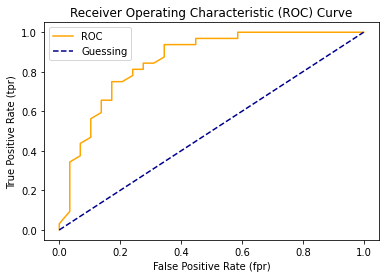

In [98]:
plot_roc_curve(fpr,tpr)

In [99]:
from sklearn.metrics import roc_auc_score

roc_auc_score(y_test, y_probs_positive)

0.8561422413793104

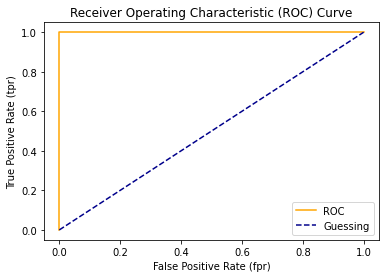

In [100]:
#Plot perfect roc_auc_score
fpr, tpr, thresholds = roc_curve(y_test, y_test)
plot_roc_curve(fpr,tpr)